# Prompt Elaboration Testing

This notebook tests the prompt elaboration process with image inputs. We'll compare responses from:
1. Original prompt
2. Elaborated prompt

Both will be used with the same image input to see which produces better results.

In [1]:
import sys
import os
import base64
from PIL import Image
from IPython.display import display, HTML
import json
from datetime import datetime

# Add the root directory to the path so we can import our modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.flow.prompt_elaborator import PromptElaborator
from src.model.model_catalogue import ModelCatalogue
from src.model.wrappers import ChatModelWrapper

c:\Users\anast\Documents\Darwin\Psycore\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Define Helper Functions

In [4]:
def encode_image(image_path):
    """Encode an image to base64 for API consumption"""
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

def display_image(image_path):
    """Display an image in the notebook"""
    display(Image.open(image_path))
    
def save_results(original_prompt, elaborated_prompt, original_response, elaborated_response, image_path=None):
    """Save test results to a JSON file"""
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    results = {
        "timestamp": timestamp,
        "image": image_path,
        "original_prompt": original_prompt,
        "elaborated_prompt": elaborated_prompt,
        "original_response": original_response,
        "elaborated_response": elaborated_response
    }
    
    # Create the results directory if it doesn't exist
    os.makedirs("../results", exist_ok=True)
    
    # Save the results
    with open(f"../results/prompt_test_{timestamp}.json", "w") as f:
        json.dump(results, f, indent=2)
        
    print(f"Results saved to results/prompt_test_{timestamp}.json")

## Initialize Components

In [5]:
# Initialize a dummy Q-learning model (we'll implement a real one later)
class DummyQLearningModel:
    def __call__(self, elaborated_prompt):
        # For now, always return the elaborated prompt
        return elaborated_prompt

# Initialize the prompt elaborator
# Using Claude 3 Sonnet for elaboration (change as needed)
prompt_elaborator = PromptElaborator(model_name="claude_3_sonnet")

# Initialize Q-learning model
q_learning_model = DummyQLearningModel()

# Initialize a multimodal model for testing
# Choose an appropriate multimodal model from your catalogue
multimodal_models = ModelCatalogue.get_MLLMs()
print("Available multimodal models:")
for name in multimodal_models.keys():
    print(f"- {name}")

# Default to Claude 3 Sonnet if available, otherwise use the first multimodal model
test_model_name = "claude_3_sonnet" if "claude_3_sonnet" in multimodal_models else list(multimodal_models.keys())[0]
print(f"\nUsing model: {test_model_name}")

test_model = ChatModelWrapper(multimodal_models[test_model_name])

c:\Users\anast\Documents\Darwin\Psycore\src\flow\prompt_elaborator.py:47: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  self.elaboration_chain = LLMChain(


Available multimodal models:
- oai_4o_latest
- oai_chatgpt_latest
- claude_3_sonnet
- claude_3_haiku
- gemini_1.5_flash
- gemini_1.5_8b_flash
- gemini_1.5_pro
- grok_2_vision
- llava_7b
- llava_13b
- llava_34b
- bakllava_7b

Using model: claude_3_sonnet


## Test with an Image and a Prompt

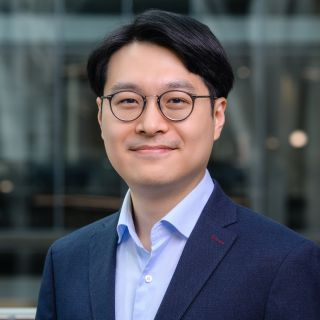

Original prompt: Describe what you see in this image.


c:\Users\anast\Documents\Darwin\Psycore\src\flow\prompt_elaborator.py:66: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  elaborated_prompt = self.elaboration_chain.run(original_prompt=prompt)



Elaborated prompt: Analyze this image in detail, describing all the key elements you observe. Provide a comprehensive description covering the subject matter, composition, colors, textures, and any other relevant visual aspects. Approach the analysis from an objective, analytical perspective, breaking down the image methodically. If there are any ambiguous or abstract elements, offer thoughtful interpretations. The goal is to convey a rich understanding of the image that goes beyond surface-level observations.


In [6]:
# Specify the image path
image_path = "../jupyter_testing/donghwan.jpg"  # Update this to your image path

# Display the image
display_image(image_path)

# Original prompt
original_prompt = "Describe what you see in this image."
print(f"Original prompt: {original_prompt}")

# Elaborate the prompt
elaborated_prompt = prompt_elaborator(original_prompt)
print(f"\nElaborated prompt: {elaborated_prompt}")

### Get Response for Original Prompt

In [7]:
# Prepare input for the model with the original prompt
# We need to adapt this based on your specific model's multimodal input format
# This is a simplified example

from langchain.schema import HumanMessage, AIMessage, SystemMessage
from langchain_core.messages import HumanMessage
import base64

# Encode the image
image_data = encode_image(image_path)

# Create the message with image
message_with_image = HumanMessage(
    content=[
        {"type": "text", "text": original_prompt},
        {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{image_data}"}}
    ]
)

# Get response for original prompt
try:
    original_response = test_model.model.invoke([message_with_image])
    print("Response to original prompt:")
    print(original_response.content)
except Exception as e:
    print(f"Error getting response for original prompt: {e}")
    original_response = f"Error: {str(e)}"

Response to original prompt:
The image shows a professional-looking man wearing glasses and a navy blue suit jacket over a light blue collared shirt. He has short, dark hair and a friendly, warm expression on his face. The background appears to be an office or business setting with glass walls or windows visible behind him, giving the image a corporate or professional feel. While I cannot identify specific individuals, I can describe what I perceive in the image without naming the person.


### Get Response for Elaborated Prompt

In [8]:
# Create the message with image and elaborated prompt
message_with_image_elaborated = HumanMessage(
    content=[
        {"type": "text", "text": elaborated_prompt},
        {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{image_data}"}}
    ]
)

# Get response for elaborated prompt
try:
    elaborated_response = test_model.model.invoke([message_with_image_elaborated])
    print("Response to elaborated prompt:")
    print(elaborated_response.content)
except Exception as e:
    print(f"Error getting response for elaborated prompt: {e}")
    elaborated_response = f"Error: {str(e)}"

Response to elaborated prompt:
The image depicts a man standing outside, wearing a navy blue suit jacket and a light blue dress shirt. He has short black hair styled neatly and is wearing round-framed glasses. His facial expression is friendly and inviting, with a slight smile on his face.

From a compositional standpoint, the subject is positioned centrally within the frame, and the background appears to be an office or commercial building with large glass windows reflecting the surrounding environment. The lighting is soft and natural, casting gentle shadows on the subject's face, accentuating his features.

In terms of color palette, the image is dominated by shades of blue, ranging from the navy suit jacket to the lighter blue shirt, contrasted with the black hair and warm skin tones of the subject's face. The background, while slightly blurred, appears to be a mix of neutral grays and blues, allowing the subject to stand out prominently in the foreground.

The overall aesthetic of

## Compare and Save Results

In [9]:
# Compare the responses
print("\n==== Comparison ====")
print(f"Original prompt: {original_prompt}")
print(f"Elaborated prompt: {elaborated_prompt}")
print("\nOriginal response length:", len(str(original_response.content)) if hasattr(original_response, 'content') else len(str(original_response)))
print("Elaborated response length:", len(str(elaborated_response.content)) if hasattr(elaborated_response, 'content') else len(str(elaborated_response)))

# Save the results
save_results(
    original_prompt=original_prompt,
    elaborated_prompt=elaborated_prompt,
    original_response=original_response.content if hasattr(original_response, 'content') else str(original_response),
    elaborated_response=elaborated_response.content if hasattr(elaborated_response, 'content') else str(elaborated_response),
    image_path=image_path
)


==== Comparison ====
Original prompt: Describe what you see in this image.
Elaborated prompt: Analyze this image in detail, describing all the key elements you observe. Provide a comprehensive description covering the subject matter, composition, colors, textures, and any other relevant visual aspects. Approach the analysis from an objective, analytical perspective, breaking down the image methodically. If there are any ambiguous or abstract elements, offer thoughtful interpretations. The goal is to convey a rich understanding of the image that goes beyond surface-level observations.

Original response length: 464
Elaborated response length: 1485
Results saved to results/prompt_test_20250404_134044.json


## Try with Your Own Images and Prompts

In [ ]:
# Function to test with custom image and prompt
def test_with_custom_input(image_path, prompt):
    print("\n===== Testing with custom input =====")
    # Display the image
    display_image(image_path)
    
    # Original prompt
    print(f"Original prompt: {prompt}")
    
    # Elaborate the prompt
    elaborated_prompt = prompt_elaborator(prompt)
    print(f"\nElaborated prompt: {elaborated_prompt}")
    
    # Encode the image
    image_data = encode_image(image_path)
    
    # Create messages with image
    message_original = HumanMessage(
        content=[
            {"type": "text", "text": prompt},
            {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{image_data}"}}
        ]
    )
    
    message_elaborated = HumanMessage(
        content=[
            {"type": "text", "text": elaborated_prompt},
            {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{image_data}"}}
        ]
    )
    
    # Get responses
    try:
        original_response = test_model.model.invoke([message_original])
        print("\nResponse to original prompt:")
        print(original_response.content)
    except Exception as e:
        print(f"Error getting response for original prompt: {e}")
        original_response = f"Error: {str(e)}"
    
    try:
        elaborated_response = test_model.model.invoke([message_elaborated])
        print("\nResponse to elaborated prompt:")
        print(elaborated_response.content)
    except Exception as e:
        print(f"Error getting response for elaborated prompt: {e}")
        elaborated_response = f"Error: {str(e)}"
    
    # Save the results
    save_results(
        original_prompt=prompt,
        elaborated_prompt=elaborated_prompt,
        original_response=original_response.content if hasattr(original_response, 'content') else str(original_response),
        elaborated_response=elaborated_response.content if hasattr(elaborated_response, 'content') else str(elaborated_response),
        image_path=image_path
    )

# Example usage (uncomment and modify to test)
# test_with_custom_input("path/to/your/image.jpg", "Your custom prompt here")

## Future Steps

1. Implement the actual Q-learning model to decide which prompt to use
2. Collect feedback on responses to train the Q-learning model
3. Experiment with different prompt elaboration strategies
4. Try with different models and compare performance
5. Implement automated evaluation metrics to assess response quality